# Clean, Process, Explore, and Model Telecommunications Dataset 
----------------------------------------------------

# 1. Data Cleaning

### Import relevant packages

In [61]:
# pandas used for import and manipulation of dataframes
import pandas as pd
# numpy used for statistical calculations
import numpy as np
# matplotlib & seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# scipy.stats for calculating zscores of fields
import scipy.stats as stats
# sklearn for principal component analysis
from sklearn.decomposition import PCA
# missingno to visualize missing values
import missingno as msno

from sklearn.preprocessing import LabelEncoder

# Used to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Classification model and used for feature selection
from sklearn.ensemble import RandomForestClassifier

# Used for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse

# Used to standardize the data
from sklearn.preprocessing import StandardScaler

# Used to build pipeline with steps to scale and fit models
from sklearn.pipeline import Pipeline

# Used for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

# Used to build pipeline with steps to scale and fit models
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

import pickle

### Read and preview churn data set

In [2]:
# Read in csv file into pandas dataframe "churn_df"
churn_df = pd.read_csv('C:/Users/Nathan/Documents/WGU/D206/Datasets/Assessment Data Sets/churn_raw_data.csv')

# Display all columns
pd.set_option('display.max_columns', None)

# Inspect head of churn data
churn_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


### Explore variables, null value counts, and dtypes

In [3]:
# List variables, null counts, and dtypes
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

### Describe variables with data dictionary

| Variable | Type | Description |
| :--- | :--- | :-- |
| Unnamed: 0 | Object | Index |
| CaseOrder | Object | Original index |
| Customer_id | Object | Primary key, id for customer |
| Interaction | Object | Key of customer account creation |
| City | Object | City where customer resides |
| State | Object | State where customer resides |
| Country | Object | Country where customer resides |
| Zip | Object | Zip of where customer resides |
| Lat | Float64 | Spatial data, latitude of residence |
| Lng | Float64 | Spatial data, longtiude of residence |
| Population | Int64 | Population within a mile radius of customer residence, based on census data |
| Area | Object | Area type (rural, urban, suburban) based on census data |
| TimeZone | Object | Time zone of customer's residence |
| Job | Object | Job of customer |
| Children | Float64 | Number of children in customer's household |
| Age | Float64 | Age of customer |
| Education | Object | Highest degree earned by customer |
| Employment | Object | Employment status of customer |
| Income | Float64 | Annual income of customer |
| Marital | Object | Marital status of customer |
| Gender | Object | Customer self-identificationas male, female, or non-binary |
| Churn | Object | Whether the customer discontinued service within the past month (yes/no) |
| Outage_sec_perweek | Float64 | Average number of seconds per week the system experiences an outage in the customer's neighborhood |
| Email | Int64 | Number of emails sent to customer in the last year |
| Contacts | Int64 | Number of times customer contacted technical suport |
| Yearly_equip_failure | Int64 | Number of times customer's equipment failed and had tobe reset/ replaced in the past year |
| Techie | Object | Whether customer considers themselves technically inclined (yes/no) |
| Contract | Object | The contract term of the customer (yes/no) |
| Port_modem | Object | Whether customer has portable modem (boolean, yes/no) |
| Tablet | Object | Whether customer has tablet (yes/no) |
| InternetService | Object | Customer's internet service provider |
| Phone | Object | Whether the customer has a phone service (yes/no) |
| Multiple | Object | Whether the customer has multiple lines (yes/no) |
| OnlineSecurity | Object | Whether the customer has an online security add-on (yes/no) |
| OnlineBackup | Object | Whether the customer has an online backup add-on (yes/no) |
| DeviceProtection | Object | Whether the customer has device protection add-on (yes/no) |
| TechSupport | Object | Whether the customer has a technical support add-on (yes/no) |
| StreamingTV | Object | Whether the customer has TV streaming (yes/no) |
| StreamingMovies | Object | Whether the customer has movie streaming (yes/no) |
| PaperlessBilling | Object | Whether the customer has paperless billing (yes/no) |
| PaymentMethod | Object | Customer payment method |
| Tenure | Float64 | Number of months the customer has stayed with the provider |
| MonthlyCharge | Float64 | Amount charged monthly |
| Bandwidth_GB_Year | Float64 | The average amount of data used in GB per year |
| item1 | Int64 | Timely response |
| item2 | Int64 | Timely fixes |
| item3 | Int64 | Timely replacements |
| item4 | Int64 | Reliability |
| item5 | Int64 | Options |
| item6 | Int64 | Respectful response |
| item7 | Int64 | Courteous exchange |
| item8 | Int64 | Evidence of active listening |

#### Identify missing values

In [4]:
churn_df.isna().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

### Identify missing data

In [5]:
for col in churn_df:
    missing_values = churn_df[col].isna().sum()
    missing_percent = missing_values / len(churn_df[col])
    if missing_values > 0:
        print(col)
        print('-'*len(col))
        print('Data Type: {}'.format(churn_df[col].dtype))
        print('Missing values: {} / {:.2%} missing'.format(missing_values, missing_percent))
        print('\n')

Children
--------
Data Type: float64
Missing values: 2495 / 24.95% missing


Age
---
Data Type: float64
Missing values: 2475 / 24.75% missing


Income
------
Data Type: float64
Missing values: 2490 / 24.90% missing


Techie
------
Data Type: object
Missing values: 2477 / 24.77% missing


Phone
-----
Data Type: object
Missing values: 1026 / 10.26% missing


TechSupport
-----------
Data Type: object
Missing values: 991 / 9.91% missing


Tenure
------
Data Type: float64
Missing values: 931 / 9.31% missing


Bandwidth_GB_Year
-----------------
Data Type: float64
Missing values: 1021 / 10.21% missing




### Check for rows or columns that are completely null/ duplicate rows

In [6]:
# Check to see if there are any completely null columns
print('Completely null columns exist: {}'.format(churn_df.isnull().all(axis=0).any()))

# Check to see if there are any completely null rows
print('Completely null rows exist: {}'.format(churn_df.isnull().all(axis=1).any()))

# Check for duplicate rows
print('Presence of duplicate rows: {}'.format(churn_df.duplicated().any()))

Completely null columns exist: False
Completely null rows exist: False
Presence of duplicate rows: False


### Identify rows with missing values
Not enough rows contain enough missing values to justify being removed from the dataset. The worst cases are 3 rows in the dataset which only contain 6 missing values each.

In [7]:
for i in range(6):
    print(str(sum(churn_df.isnull().sum(axis=1) > i)) + ' / ' + 
          str(round(sum(churn_df.isnull().sum(axis=1) > i)/len(churn_df)*100,2)) + 
          '% rows with ' + str(i+1) + ' or more missing values.')

7867 / 78.67% rows with 1 or more missing values.
4221 / 42.21% rows with 2 or more missing values.
1437 / 14.37% rows with 3 or more missing values.
333 / 3.33% rows with 4 or more missing values.
45 / 0.45% rows with 5 or more missing values.
3 / 0.03% rows with 6 or more missing values.


### Visualize counts of missing values

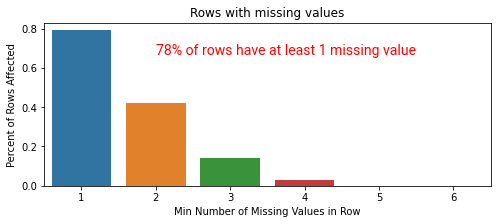

In [8]:
missing_data_df = pd.DataFrame(columns=['Min Number of Missing Values in Row', 'Count of Rows Affected', 'Percent of Rows Affected'], index=range(1,7))


for i in range(6):
    missing_data_df.iloc[i][0] = i+1
    missing_data_df.iloc[i][1] = sum(churn_df.isnull().sum(axis=1) > i)
    missing_data_df.iloc[i][2] = round(sum(churn_df.isnull().sum(axis=1) > i) / len(churn_df), 2)

fix, ax = plt.subplots(figsize=[8,3])
    
sns.barplot(data=missing_data_df, x='Min Number of Missing Values in Row', y='Percent of Rows Affected')


# Provide annotation to the selection box
font_dict={'family': 'roboto', 'color': 'r', 'size': 14}
ax.text(1, .67,'78% of rows have at least 1 missing value',  fontdict=font_dict)

plt.title('Rows with missing values')
plt.show()

### Visualize location of missing values in data
Missing data appears to be missing completely at random

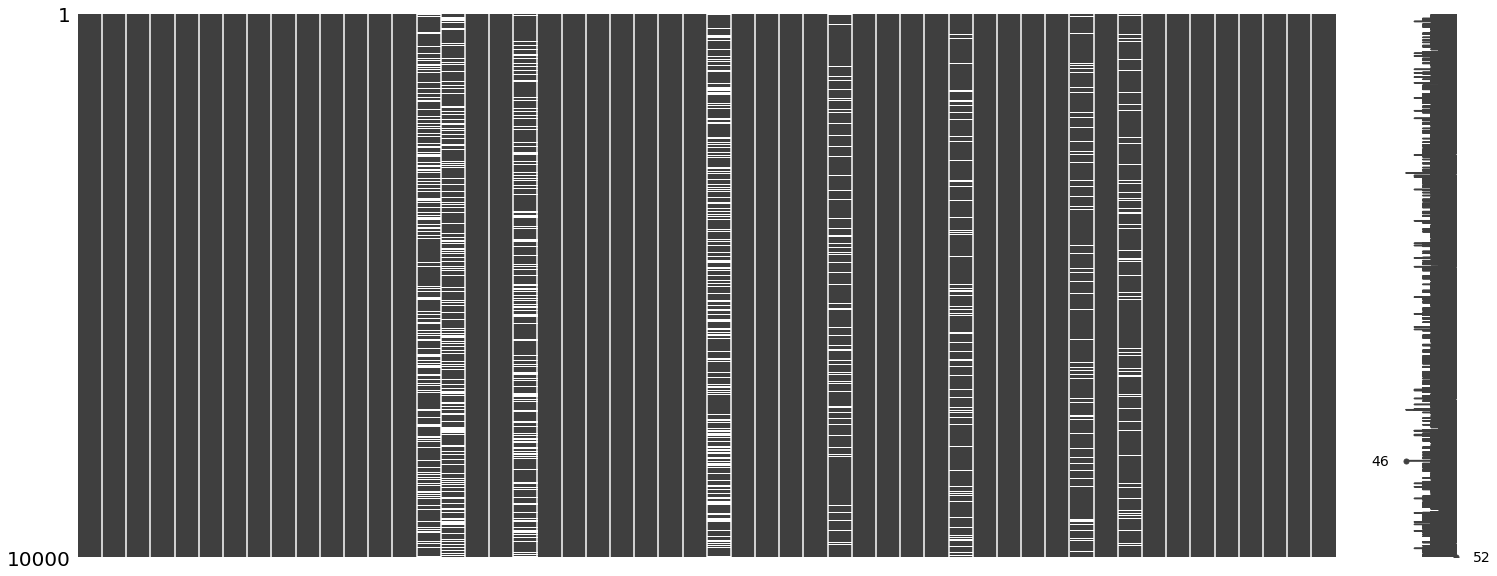

In [9]:
# Visualize missing values as a matrix to determine whether they are missing completely at random, missing at random, or missing not at random
msno.matrix(churn_df)
plt.show()

### Visualize boxplots of continuous variables to investigate outliers


Only Yearly_equip_failure shows an outlier that is a much higher value than the rest of the dataset. Since the rest of the outliers do not appear to be errors, they are left in the dataset.

Without normalization, we can't compare the distributions to each other in one plot because Income and other variables stretch the y axis values too high which shrinks the other boxplots.


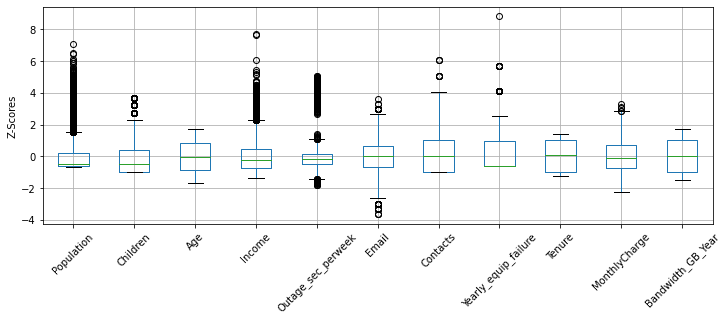

In [10]:
# Identify continuous variables to investigate
churn_cont = churn_df[['Population', 'Children', 'Age', 
                         'Income', 'Outage_sec_perweek', 'Email', 
                         'Contacts', 'Yearly_equip_failure', 'Tenure', 
                         'MonthlyCharge', 'Bandwidth_GB_Year']]

# Normalize continuous variables
churn_cont_normalized = (churn_cont - churn_cont.mean())/churn_cont.std()


#  Plot boxplots of all normalized variables to observe any unusual outliers
# Set figure and axis
fig, ax = plt.subplots(figsize=[12,4])
# Plot boxplot of churn_cont_normalized
churn_cont_normalized.boxplot()
# Rotate axis ticks to ensure they're all visible
plt.xticks(rotation=45)
# Title y-axis
plt.ylabel('Z-Scores')
# Call plot
plt.show()

#### After investigating the outliers of Yearly_equip_failure further, it appears the maximum value is of 6. This does not appear to be a mistake but is worth looking further into to determine causes of the high amount of equipment failure. 

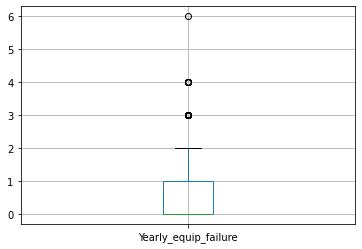

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [11]:
churn_df.boxplot('Yearly_equip_failure')
plt.show()
churn_df['Yearly_equip_failure'].describe()

## Impute Missing Values

#### Age, Tenure, Bandwidth_GB_Year have no outliers and have mean values very close to the median which can be used to impute null values. Children and Income have outliers present that are strongly influencing the mean. Further investigation of outliers to determine if median can be used to impute null values.

In [12]:
fill_na_list = ['Children', 'Income', 'Age', 'Tenure', 'Bandwidth_GB_Year']

churn_df[fill_na_list].describe()

,Children,Income,Age,Tenure,Bandwidth_GB_Year
count,7505.000000,7510.000000,7525.000000,9069.000000,8979.000000
mean,2.095936,39936.762226,53.275748,34.498858,3398.842752
std,2.154758,28358.469482,20.753928,26.438904,2187.396807
min,0.000000,740.660000,18.000000,1.000259,155.506715
25%,0.000000,19285.522500,35.000000,7.890442,1234.110529
50%,1.000000,33186.785000,53.000000,36.196030,3382.424000
75%,3.000000,53472.395000,71.000000,61.426670,5587.096500
max,10.000000,258900.700000,89.000000,71.999280,7158.982000


#### Use fillna to impute missing values with the median and mean from the dataset (as identified above)
Children, Income, and Age all have outliers that affect the mean, use median to impute values
Tenure and Bandwidth_GB_Year have 

In [13]:
fillna_median = ['Children', 'Income', 'Age']
fillna_mean = ['Tenure', 'Bandwidth_GB_Year']

for i in fillna_median:
    churn_df[i].fillna(churn_df[i].median(), inplace=True)
    
for i in fillna_mean:
    churn_df[i].fillna(churn_df[i].mean(), inplace=True)

### Replace all values in 

In [14]:
# Loop through list of remaining columns
for col in ['Techie', 'Phone', 'TechSupport']:
    # Replace null values with most common category for each column
    churn_df[col].fillna(max(churn_df[col].value_counts().index), inplace=True)

#### Check to ensure missing values are filled

In [15]:
churn_df.isnull().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

## Convert to numerical data

#### Convert "Yes/No" categorical columns to numeric "1/0" values

In [16]:
converted_columns = ['Churn', 
                     'Techie', 
                     'Port_modem', 
                     'Tablet', 
                     'Phone', 
                     'Multiple', 
                     'OnlineSecurity', 
                     'OnlineBackup', 
                     'DeviceProtection', 
                     'TechSupport',
                     'StreamingTV', 
                     'StreamingMovies', 
                     'PaperlessBilling']

for i in converted_columns:
    churn_df[i] = churn_df[i].map({'Yes':1, 'No':0})

## Investigate outliers further

#### Calculate zscores for Income and Children to further investigate outliers

In [17]:
churn_df['Zscore_Income'] = stats.zscore(churn_df['Income'])
churn_df['Zscore_Children'] = stats.zscore(churn_df['Children'])

#### The minimum Income outlier is 113k, the maximum Income outlier is 258k. While these values vary enough from the data set to be classified as outliers, they appear to be valid and will be left in the data set.

In [18]:
income_outliers = churn_df['Income'][(churn_df['Zscore_Income'] > 3) | (churn_df['Zscore_Income'] < -3)]
income_outliers.describe()

count       193.000000
mean     134417.987513
std       22654.953051
min      112687.700000
25%      118120.160000
50%      128114.290000
75%      145569.500000
max      258900.700000
Name: Income, dtype: float64

#### The minimum Children outlier is 8, the maximum Children outlier is 10. While these values vary enough from the data set to be classified as outliers, they appear to be valid and will be left in the data set.

In [19]:
children_outliers = churn_df['Children'][(churn_df['Zscore_Children'] > 3) | (churn_df['Zscore_Children'] < -3)]
children_outliers.describe()

count    302.000000
mean       8.721854
std        0.832552
min        8.000000
25%        8.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: Children, dtype: float64

### Export Cleaned Dataset

In [ ]:
churn_df.to_csv('churn_data_cleaned.csv', index=False)

# 2. Preprocessing

In [20]:
# Create list of columns to convert
converted_columns = ['Churn', 
                     'Techie', 
                     'Port_modem', 
                     'Tablet', 
                     'Phone', 
                     'Multiple', 
                     'OnlineSecurity', 
                     'OnlineBackup', 
                     'DeviceProtection', 
                     'TechSupport',
                     'StreamingTV', 
                     'StreamingMovies', 
                     'PaperlessBilling']

labelEncoder = LabelEncoder()

# Run for loop iterating through columns to convert, pass dictionary through map function to convert yes/no to 1/0
for i in converted_columns:
    churn_df[i] = labelEncoder.fit_transform(churn_df[i])

In [21]:
# Create dictionary for survey variables that need to be renamed
churn_item_cols = {'item1': 'Timely_Response',
                         'item2': 'Timely_Fixes',
                         'item3': 'Timely_Replacements',
                         'item4': 'Reliability',
                         'item5': 'Options',
                         'item6': 'Respectful_Response',
                         'item7': 'Courteous_Exchange',
                         'item8': 'Active_Listening'}

churn_df.rename(columns=churn_item_cols, inplace=True)

In [22]:
churn_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening,Zscore_Income,Zscore_Children
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,1.0,68.0,Master's Degree,Part Time,28561.990,Widowed,Male,0,6.972566,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,-0.391731,-0.427079
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.770,Married,Female,1,12.014541,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,-0.668828,-0.427079
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,33186.785,Widowed,Female,0,10.245616,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3,-0.204845,1.130655
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.230,Married,Male,0,15.206193,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3,-0.781148,-0.427079
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.190,Separated,Male,1,8.960316,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5,0.073471,-0.946323


In [23]:
# Rename variables
churn_df.rename(columns=churn_item_cols, inplace=True)

# Use pandas get dummies for categorical fields "Area", "Marital", "Contract"
categorical_conversions = ['Area', 'Marital', 'Contract']
churn_df = pd.get_dummies(churn_df, columns=categorical_conversions)

In [24]:
# Define numeric features to be used in analysis
numeric_features = ['Population', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 
            'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet',
            'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
            'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fixes',
            'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
            'Courteous_Exchange', 'Active_Listening', 'Area_Rural', 'Area_Suburban',
            'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
            'Marital_Separated', 'Marital_Widowed','Contract_Month-to-month', 'Contract_One year', 
            'Contract_Two Year']

# Create dataframe with only numeric variables
churn_numeric = churn_df[numeric_features]

# 3. Data Exploration

### Explore categorical values in data set

In [25]:
for col in churn_df:
    unique_values = churn_df[col].unique()
    if len(unique_values) <= 25:
        print(col)
        print('-'*len(col))
        print(str(len(unique_values)) + ' unique values:')
        print(unique_values)
        print("\n")

Timezone
--------
25 unique values:
['America/Sitka' 'America/Detroit' 'America/Los_Angeles' 'America/Chicago'
 'America/New_York' 'America/Puerto_Rico' 'America/Denver'
 'America/Menominee' 'America/Phoenix' 'America/Indiana/Indianapolis'
 'America/Boise' 'America/Kentucky/Louisville' 'Pacific/Honolulu'
 'America/Indiana/Petersburg' 'America/Nome' 'America/Anchorage'
 'America/Indiana/Knox' 'America/Juneau' 'America/Toronto'
 'America/Indiana/Winamac' 'America/Indiana/Vincennes'
 'America/North_Dakota/New_Salem' 'America/Indiana/Tell_City'
 'America/Indiana/Marengo' 'America/Ojinaga']


Children
--------
11 unique values:
[ 1.  4.  0.  3.  2.  7.  5.  9.  6. 10.  8.]


Education
---------
12 unique values:
["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9th Grade to 12th Grade, No Diploma'

### Explore correlations in dataset

In [26]:
# Create list of condensed, relevant features to compare correlations
churn_corr_cols = ['Churn', 'Multiple', 'OnlineBackup',
                           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                           'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fixes',
                            'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
                            'Courteous_Exchange', 'Active_Listening']

churn_df[churn_corr_cols].corr()

,Churn,Multiple,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening
Churn,1.000000,0.131771,0.050508,0.056489,0.021599,0.230151,0.289262,-0.463529,0.367495,-0.418029,-0.007341,-0.013253,-0.011143,-0.003396,-0.013971,0.001130,-0.008851,0.005653
Multiple,0.131771,1.000000,-0.002566,0.003207,-0.006631,0.003097,0.004691,-0.011856,0.379830,0.007616,0.009742,-0.012895,0.008178,-0.008308,-0.002405,-0.008261,0.010382,-0.007358
OnlineBackup,0.050508,-0.002566,1.000000,0.009991,-0.010078,-0.008043,0.001434,0.020019,0.258050,0.037168,-0.006109,0.008163,-0.008881,-0.011900,0.012354,-0.005607,0.001797,-0.001988
DeviceProtection,0.056489,0.003207,0.009991,1.000000,0.004271,0.002878,0.019450,-0.024795,0.163332,0.000241,0.002204,0.005967,-0.008427,-0.008258,0.003764,0.001334,-0.018550,0.007112
TechSupport,0.021599,-0.006631,-0.010078,0.004271,1.000000,-0.006658,-0.011086,-0.010127,0.103576,-0.007049,0.025775,0.017392,0.018290,0.020131,-0.006987,0.012737,0.013534,0.005431
StreamingTV,0.230151,0.003097,-0.008043,0.002878,-0.006658,1.000000,-0.010516,0.000764,0.477512,0.053090,0.003825,-0.000703,-0.013509,0.009715,-0.014152,0.003253,-0.011927,0.008204
StreamingMovies,0.289262,0.004691,0.001434,0.019450,-0.011086,-0.010516,1.000000,-0.003042,0.602067,0.039200,-0.009834,-0.006949,-0.005144,-0.000541,0.002288,0.001975,-0.009814,-0.003400
Tenure,-0.463529,-0.011856,0.020019,-0.024795,-0.010127,0.000764,-0.003042,1.000000,-0.003403,0.894174,-0.006346,0.007125,0.006183,-0.005346,0.020531,-0.007183,-0.001586,-0.014274
MonthlyCharge,0.367495,0.379830,0.258050,0.163332,0.103576,0.477512,0.602067,-0.003403,1.000000,0.057227,0.009014,0.001088,-0.011790,0.001555,-0.006469,0.003854,-0.007121,0.003293
Bandwidth_GB_Year,-0.418029,0.007616,0.037168,0.000241,-0.007049,0.053090,0.039200,0.894174,0.057227,1.000000,-0.006803,0.006105,-0.006043,-0.007700,0.022099,-0.009307,0.002655,-0.012031


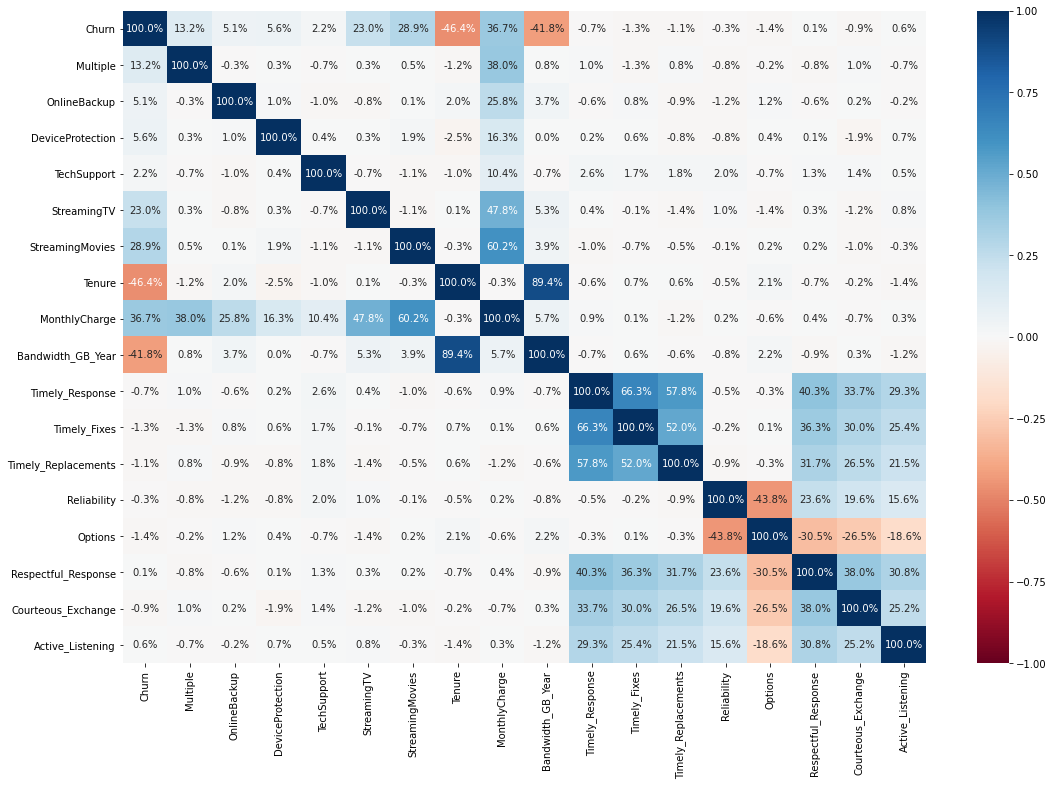

In [27]:
# Create fig, ax and set figsize
fig, ax = plt.subplots(figsize=(18,12))
# Generate heatmap of correlated r values
sns.heatmap(churn_df[churn_corr_cols].corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, fmt='.1%')
plt.show()

#### Plotting a pairplot with regression lines to observe the relationships between continuous fields

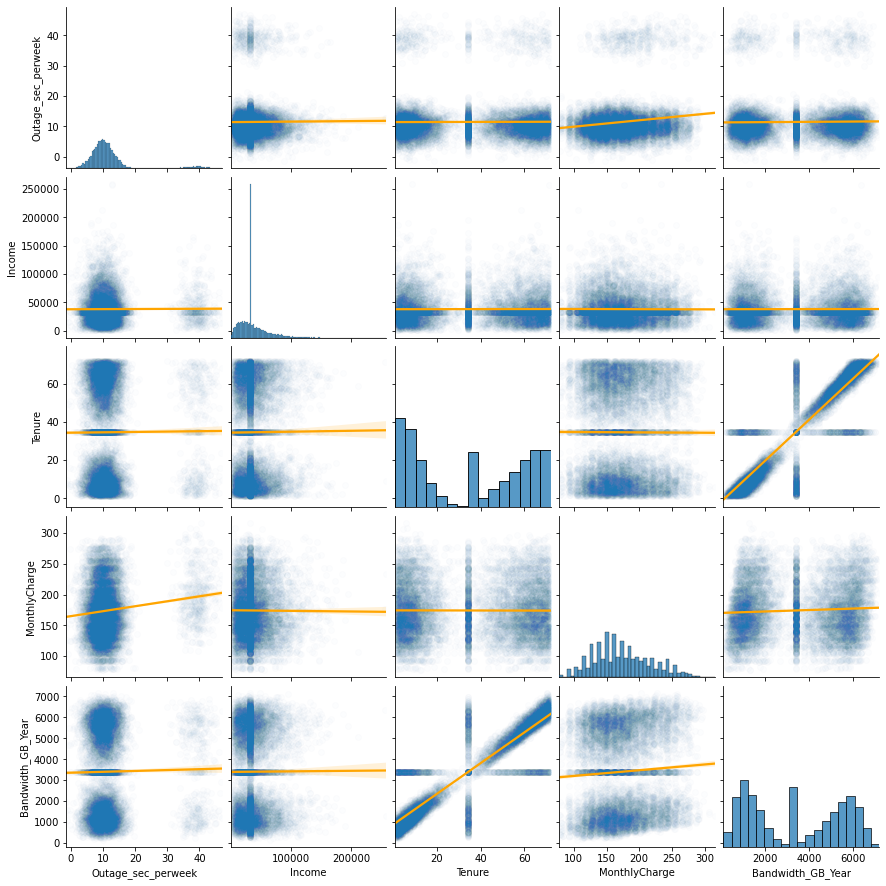

In [28]:
# Generate pairplot comparing correlations through scatterplots and regression lines
sns.pairplot(churn_df[['Outage_sec_perweek', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']], 
             kind='reg', plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'alpha': 0.01}})
plt.show()

#### Bandwidth_GB_Year and Tenure appear to have multicollinearity

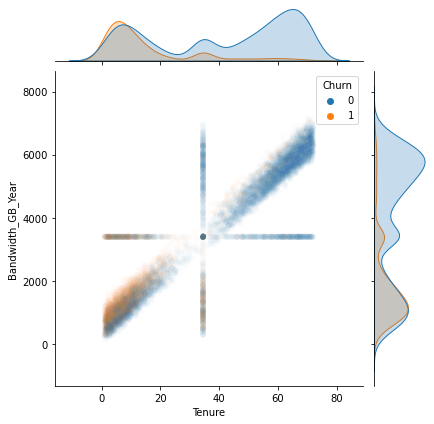

In [29]:
sns.jointplot(data=churn_df, x='Tenure', y='Bandwidth_GB_Year', hue='Churn', alpha=0.02)
plt.show()

#### Explore distribution of monthly charges for customers who have and have not churned

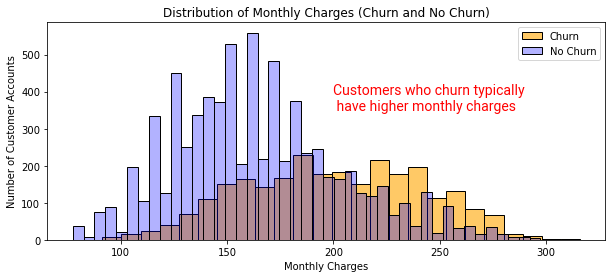

In [30]:
churn_yes = churn_df[churn_df['Churn'] == 1]
churn_no = churn_df[churn_df['Churn'] == 0]

fig, ax = plt.subplots(figsize=[10,4])

sns.histplot(churn_yes['MonthlyCharge'], label='Churn', color='orange', alpha=0.6, ax=ax)
sns.histplot(churn_no['MonthlyCharge'], label='No Churn', color='blue', alpha=0.3, ax=ax)

font_dict={'family': 'roboto', 'color': 'r', 'size': 14}
ax.text(200, 350,'Customers who churn typically \n have higher monthly charges',  fontdict=font_dict)

plt.legend()
plt.title('Distribution of Monthly Charges (Churn and No Churn)')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customer Accounts')
plt.show()

In [31]:
churn_model_features = churn_df[['Population', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 
                                'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet',
                                'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
                                'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fixes',
                                'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
                                'Courteous_Exchange', 'Active_Listening', 'Area_Rural', 'Area_Suburban',
                                'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
                                'Marital_Separated', 'Marital_Widowed','Contract_Month-to-month', 'Contract_One year', 
                                'Contract_Two Year']]

In [32]:
# Drop Tenure due to multicollinearity
churn_model_features = churn_model_features.drop('Tenure', axis=1)

# 4. Random Forest Classification Model

### A1. Initial Random Forest Classification Model

#### Define dependent and independent variables and split the training and testing data

In [53]:
# Create arrays for dependent and independent variables
X = churn_model_features.drop(['Churn'], axis=1)
y = churn_model_features['Churn']

# Establish random state seed for reproducability
SEED = 13

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

#### Create scaler, decision tree classifier, and pipeline

In [54]:
# Create scaler
scaler = StandardScaler()

# Create decision tree classifier
rfc = RandomForestClassifier(random_state=SEED, criterion='entropy', max_depth=10)

# Create pipeline with scaler and rfc model
pipeline = make_pipeline(scaler, rfc)

#### Run random forest classification model before reducing variables

In [56]:
# Scale and fit training data to the model using pipeline
pipeline.fit(X_train, y_train)

# Create empty list to add features to
churn_features = []
# Create empty list to add feature importance scores to
churn_feature_scores = []
# Print title
print('Feature Importance Scores')
print('='*50+'\n')
# Iterate through enumerated list
for i, column in enumerate(churn_model_features.drop(['Churn'], axis=1)):
    # Append features and scores to empty lists above for sorting
    churn_features.append(column)
    churn_feature_scores.append(rfc.feature_importances_[i])
    
# Create dataframe with pandas and zip function from churn feature lists
churn_feature_scores_df = pd.DataFrame(zip(churn_features, churn_feature_scores), 
                                       columns=['Feature', 'Feature Importance'])
# Sort and display dataframe in descending order by feature importance score
churn_feature_scores_df.sort_values('Feature Importance', ascending=False)

Feature Importance Scores



,Feature,Feature Importance
21,Bandwidth_GB_Year,0.297522
20,MonthlyCharge,0.148534
18,StreamingMovies,0.075743
38,Contract_Month-to-month,0.069469
17,StreamingTV,0.041048
40,Contract_Two Year,0.036151
0,Population,0.029328
4,Outage_sec_perweek,0.028731
3,Income,0.026946
2,Age,0.022336


### A2. Evaluate Initial Random Forest Classification Model

Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2355
           1       0.64      0.78      0.70       645

    accuracy                           0.86      3000
   macro avg       0.79      0.83      0.80      3000
weighted avg       0.87      0.86      0.86      3000

Confusion Matrix
------------------------------


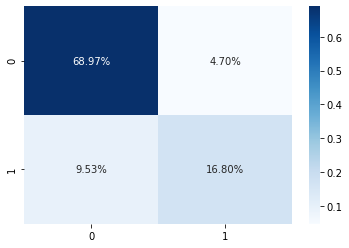

In [57]:
# Calculate predictions to measure accuracy score
y_pred = pipeline.predict(X_test)

# Classification report
print('Classification Report')
print('-'*30)
print(classification_report(y_pred, y_test))
print('='*50)
    
# Confusion matrix
print('Confusion Matrix')
print('-'*30)

# Create prediction matrix
churn_log_matrix = confusion_matrix(y_test, y_pred)
# Create heat map visualization of prediction matrix
sns.heatmap(churn_log_matrix/np.sum(churn_log_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.show()

### B. Feature selection/ reduction

In [58]:
# Create recursive feature eliminator with random forest classifier, 3 selected features, 
rfe = RFE(estimator=rfc, n_features_to_select=3, step=3, verbose=1)
# Fit recursive feature eliminator to training data
rfe.fit(X_train, y_train)
# Store remaining features in mask
mask = rfe.support_
# Create reduced variable test and training sets
X_train_reduced = X_train.loc[:, mask]
X_test_reduced = X_test.loc[:, mask]
# Print columns of reduced variables
print(X_train_reduced.columns)

# Fit pipeline to reduced training data
pipeline.fit(X_train_reduced, y_train)
# Calculate accuracy score of reduced model
print('Accuracy score: '+str(accuracy_score(pipeline.predict(X_test_reduced), y_test)))

Fitting estimator with 41 features.
Fitting estimator with 38 features.
Fitting estimator with 35 features.
Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
Fitting estimator with 8 features.
Fitting estimator with 5 features.
Index(['MonthlyCharge', 'Bandwidth_GB_Year', 'Contract_Month-to-month'], dtype='object')
Accuracy score: 0.8553333333333333


### C. Evaluate Reduced Random Forest Classification Model

Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2238
           1       0.71      0.73      0.72       762

    accuracy                           0.86      3000
   macro avg       0.81      0.82      0.81      3000
weighted avg       0.86      0.86      0.86      3000

Confusion Matrix
------------------------------


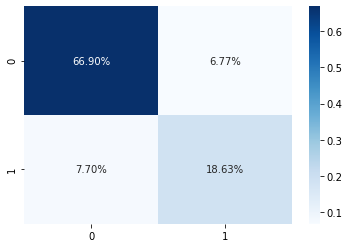

In [59]:
# Calculate predictions to measure accuracy score
y_pred = pipeline.predict(X_test_reduced)

# Classification report
print('Classification Report')
print('-'*30)
print(classification_report(y_pred, y_test))
print('='*50)
    
# Confusion matrix
print('Confusion Matrix')
print('-'*30)

# Create prediction matrix
churn_log_matrix = confusion_matrix(y_test, y_pred)
# Create heat map visualization of prediction matrix
sns.heatmap(churn_log_matrix/np.sum(churn_log_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.show()

#### Calculate feature importance scores for reduced variables

In [60]:
# Calculate feature importance scores for reduced variables
feature_scores = dict(zip(X_train_reduced, rfc.feature_importances_.round(2)))
# Convert dictionary of feature importance scores into pandas dataframe
feature_scores_df = pd.DataFrame(list(feature_scores.items()),columns = ['Features','Feature_Importance']) 
# Sort reduced features by feature importance scores in descending order
feature_scores_df.sort_values('Feature_Importance', ascending=False)

,Features,Feature_Importance
1,Bandwidth_GB_Year,0.48
0,MonthlyCharge,0.40
2,Contract_Month-to-month,0.13


### Save Random Forest Classification model

In [63]:
Model_file = 'telecomms_rfc_model.pkl'

pickle.dump(pipeline, open(Model_file, 'wb'))

### Load Random Forest Classification model

In [64]:
loaded_model = pickle.load(open(Model_file, 'rb'))